In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re


In [10]:
# Define the data
libraries = ['Curand', 'OpenRAND', "Random123"]
platforms = ['V100', 'A100']

# Sample performance data (replace with your own)
performance_Curand = [4.23, 3.20]  # For Curand
performance_OpenRAND = [2.48, 1.78]  # For OpenRAND
performance_r123 = [2.46, 1.81]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


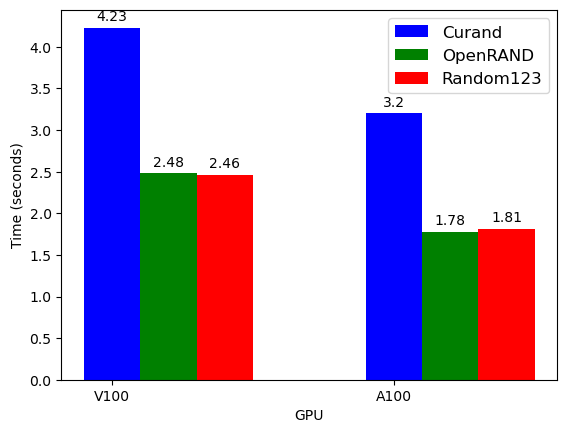

In [12]:
x = np.arange(len(platforms))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()

# Create bars
rects1 = ax.bar(x, performance_Curand, width, label='Curand', color='b')
rects2 = ax.bar(x + width, performance_OpenRAND, width, label='OpenRAND', color='g')
rects3 = ax.bar(x + 2*width, performance_r123, width, label='Random123', color='r')

# Add some text for labels, title, and legend
ax.set_ylabel('Time (seconds)')
#ax.set_title('Performance comparison of OpenRAND vs Curand on GPU')
ax.set_xticks(x)
ax.set_xticklabels(platforms)
ax.legend(fontsize='large')
plt.xlabel('GPU')

# Add value labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show the plot
plt.savefig("gpu.eps", format='eps')
plt.show()
